In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import signal

In [ ]:
df = pd.read_csv('../input/SBER_240202_240601.csv', sep=";")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1161 non-null   object 
 1   <PER>     1161 non-null   int64  
 2   <DATE>    1161 non-null   int64  
 3   <TIME>    1161 non-null   int64  
 4   <OPEN>    1161 non-null   float64
 5   <HIGH>    1161 non-null   float64
 6   <LOW>     1161 non-null   float64
 7   <CLOSE>   1161 non-null   float64
 8   <VOL>     1161 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 81.8+ KB


In [ ]:
df.sample(12)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
752,SBER,60,240419,210000,307.89,307.92,307.50,307.81,624480
495,SBER,60,240326,160000,293.57,293.98,293.27,293.33,743810
1106,SBER,60,240528,110000,319.88,320.45,318.81,319.77,4141580
323,SBER,60,240307,120000,297.92,298.95,297.59,298.03,2844050
308,SBER,60,240306,110000,298.13,298.75,298.00,298.15,1605000
1095,SBER,60,240527,140000,318.49,320.00,318.39,319.34,2232380
1051,SBER,60,240522,120000,322.54,322.70,322.24,322.60,1376270
18,SBER,60,240205,140000,278.13,278.20,277.70,277.87,769270
389,SBER,60,240314,220000,296.06,296.29,296.00,296.08,500230
541,SBER,60,240329,200000,298.87,298.90,298.68,298.80,369980


In [ ]:
df = df.drop(['<TICKER>', '<PER>', '<VOL>'], axis=1)

In [ ]:
df = df.rename(columns={'<DATE>' : 'date', '<TIME>' : 'time', '<LOW>': 'low', '<OPEN>':'open', '<CLOSE>': 'close', '<HIGH>' : 'high'})

In [ ]:
df.sample(8)

,date,time,open,high,low,close
832,240427,170000,308.92,309.49,308.92,309.30
130,240215,150000,289.33,289.65,289.00,289.33
428,240319,190000,295.69,296.53,295.41,296.15
894,240503,230000,307.73,307.78,307.45,307.53
488,240325,230000,293.95,293.95,293.65,293.90
1137,240530,140000,319.79,320.13,319.09,319.24
419,240319,100000,298.30,299.14,298.10,298.60
269,240301,140000,292.82,292.99,292.80,292.99


<Axes: >

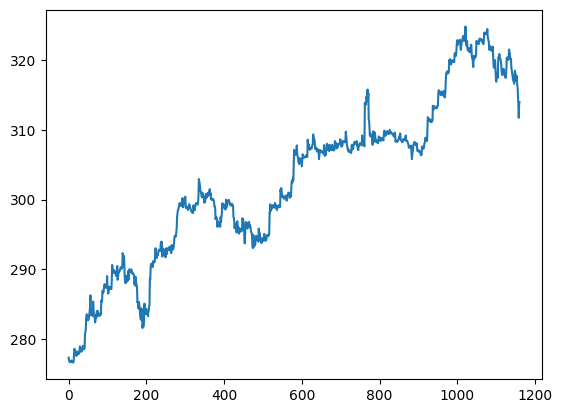

In [ ]:
fig, ax = plt.subplots()
df['high'].plot(kind='line')

In [ ]:
def filtration(data, filter_duration, plot_title):
    data = data.values
    transfer_func = signal.TransferFunction([1], [filter_duration, 1])
    t = np.arange(0, len(data), 1)
    fig, ax = plt.subplots()
    new_t, new_data, _ = signal.lsim(transfer_func, data, t)
    plt.title(plot_title)
    ax.plot(t, data, label='Оригинал')
    print(len(t) - len(new_t))
    ax.plot(new_t, new_data, label='Сглаженный')
    plt.legend()
    plt.grid(True)
    plt.savefig('../output/1day.jpg')
filtration(df['high'], 1, 'T = 1 день')